In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)

In [2]:
# Nos traemos el data set 
n = pd.read_csv("../../Raw Data/archive.csv",encoding = "ISO-8859-1")
n.head(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,ChÃ¢tenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [3]:
n = n.dropna()
selected_columns = n[["Full Name","Birth Date","Sex","Birth Country","Category",]]
df = selected_columns.copy()
df.head(3)

,Full Name,Birth Date,Sex,Birth Country,Category
0,Jacobus Henricus van 't Hoff,1852-08-30,Male,Netherlands,Chemistry
2,Emil Adolf von Behring,1854-03-15,Male,Prussia (Poland),Medicine
5,Wilhelm Conrad RÃ¶ntgen,1845-03-27,Male,Prussia (Germany),Physics


In [4]:
df = df.rename({'Birth Date': 'Birth_date'}, axis=1)
df.head(1)

,Full Name,Birth_date,Sex,Birth Country,Category
0,Jacobus Henricus van 't Hoff,1852-08-30,Male,Netherlands,Chemistry


In [5]:
df = df.loc[df["Birth Country"] != "United States of America"]
df = df.loc[df["Birth Country"] != "United Kingdom"]

In [6]:
df.head(1)

,Full Name,Birth_date,Sex,Birth Country,Category
0,Jacobus Henricus van 't Hoff,1852-08-30,Male,Netherlands,Chemistry


In [7]:
df.drop(df[df.Birth_date == "1898-00-00"].index, inplace=True)

In [8]:
df['year'] = pd.DatetimeIndex(df['Birth_date']).year
df['month'] = pd.DatetimeIndex(df['Birth_date']).month
df['day'] = pd.DatetimeIndex(df['Birth_date']).day
df.head(3)

,Full Name,Birth_date,Sex,Birth Country,Category,year,month,day
0,Jacobus Henricus van 't Hoff,1852-08-30,Male,Netherlands,Chemistry,1852,8,30
2,Emil Adolf von Behring,1854-03-15,Male,Prussia (Poland),Medicine,1854,3,15
5,Wilhelm Conrad RÃ¶ntgen,1845-03-27,Male,Prussia (Germany),Physics,1845,3,27


In [9]:
def trimestres(row):
    if row['month'] < 4 :
        return 1
    elif row['month'] < 7:
        return 2
    elif row['month'] < 10:
        return 3
    else:
        return 4     

In [10]:
df['trimestre'] = df.apply (lambda month: trimestres(month), axis=1)

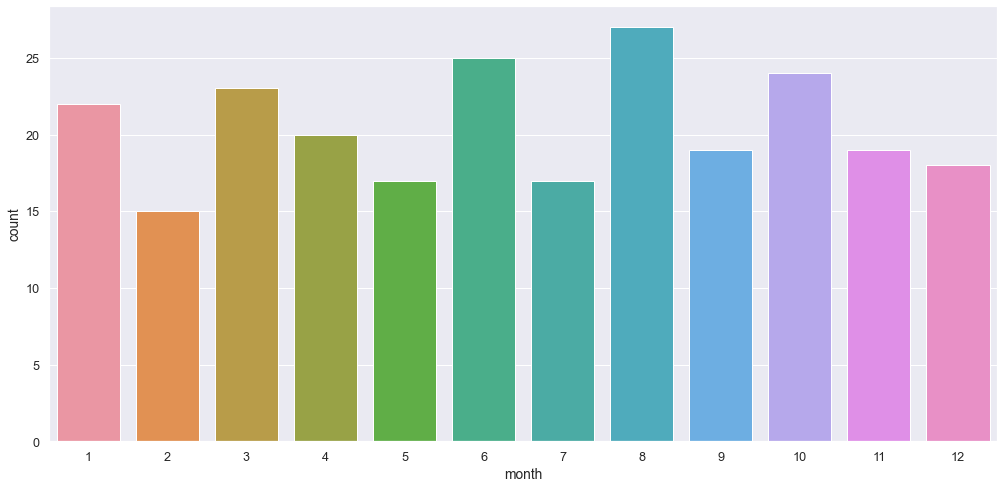

In [11]:
ax = sns.countplot(x="month", data=df)

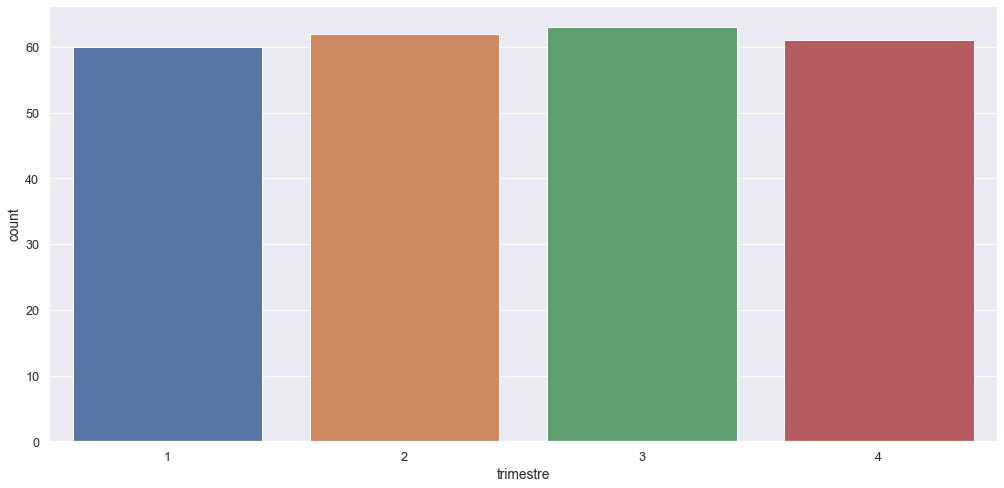

In [12]:
ax = sns.countplot(x="trimestre", data=df)

In [13]:
df.to_csv('../../Data/nobel.csv', encoding='utf-8')